# Exercise 2

### 1. Load ‘housing.csv’ file with pandas.

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('housing.csv')

### 2. Split dataset into training and testing datasets. Use 80% of the data for training and 20% for testing. Set seed as 42. Use the training set for the following questions.

In [3]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

### 3. Create histograms for each of the following columns: ‘housing_median_age’, ‘total_bedrooms’, and ‘population’.

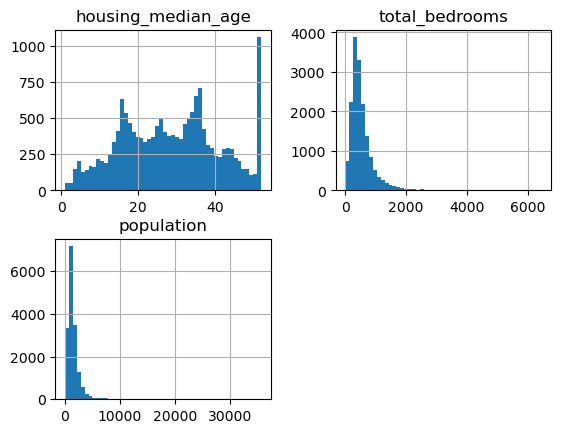

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
train_set[['housing_median_age', 'total_bedrooms', 'population']].hist(bins=50)
plt.show()

### 4. Create a scatterplot of ‘longitude’ and ‘latitude’.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

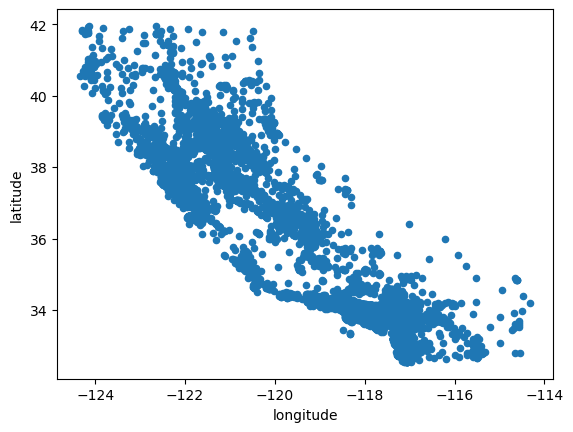

In [5]:
train_set.plot(kind="scatter", x="longitude", y="latitude")

### 5. Create new attributes of ‘rooms_per_household’ and ‘bedrooms_per_room’. Create a scatterplot of these two attributes and compute the correlation coefficient between these two attributes.

,rooms_per_household,bedrooms_per_room
rooms_per_household,1.000000,-0.435169
bedrooms_per_room,-0.435169,1.000000


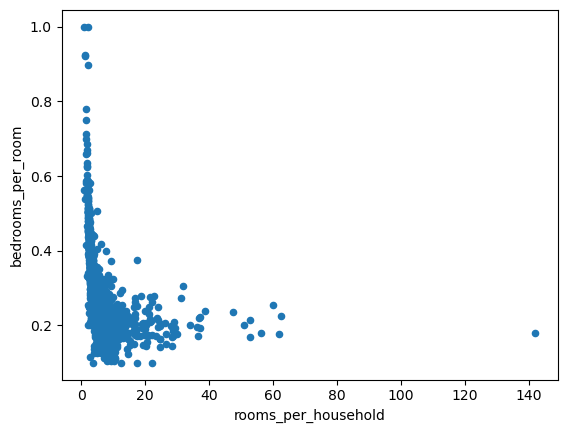

In [6]:
train_set["rooms_per_household"] = train_set["total_rooms"]/train_set["households"]
train_set["bedrooms_per_room"] = train_set["total_bedrooms"]/train_set["total_rooms"]

train_set.plot(kind="scatter", x="rooms_per_household", y="bedrooms_per_room")
corr_matrix = train_set[["rooms_per_household", "bedrooms_per_room"]].corr()
corr_matrix

### 6. Apply min-max scaling to all numerical variables and run describe().

In [7]:
train_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room'],
      dtype='object')

In [8]:
train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582290,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,3.880754,207194.693738,5.435235,0.212858
std,2.005654,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,1.904294,115622.626448,2.387375,0.057995
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.888889,0.100000
25%,-121.810000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,2.566700,119800.000000,4.452055,0.175178
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,3.545800,179850.000000,5.235874,0.202808
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,4.773175,265125.000000,6.061037,0.239501
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

for col in ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income',
            'median_house_value', 'rooms_per_household', 'bedrooms_per_room']:
    train_set[col] = scaler.fit_transform(train_set[[col]])

train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,0.474871,0.329058,0.541339,0.067145,0.083410,0.039896,0.082057,0.233159,0.396278,0.032239,0.125398
std,0.199766,0.227305,0.247108,0.055309,0.065023,0.031869,0.062649,0.131329,0.238396,0.016929,0.064439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.252988,0.146809,0.333333,0.036930,0.045895,0.022030,0.045881,0.142536,0.216084,0.025267,0.083531
50%,0.581673,0.181915,0.549020,0.054097,0.067660,0.032624,0.067259,0.210059,0.339898,0.030825,0.114231
75%,0.631474,0.550000,0.705882,0.080319,0.100248,0.048292,0.099490,0.294705,0.515722,0.036677,0.155002
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
